### WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Set the API base URL
    url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}"
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = rq.get(url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | sedalia
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | lahij
Processing Record 6 of Set 1 | wanning
Processing Record 7 of Set 1 | anchorage
Processing Record 8 of Set 1 | tecoman
Processing Record 9 of Set 1 | aklavik
Processing Record 10 of Set 1 | harbour breton
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | sioni
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | lavrentiya
Processing Record 16 of Set 1 | ilo
Processing Record 17 of Set 1 | mayo
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | karimganj
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | clyde river
Processing Record 23 of S

Processing Record 39 of Set 4 | vao
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | eagle
Processing Record 42 of Set 4 | grafton
Processing Record 43 of Set 4 | roald
Processing Record 44 of Set 4 | cape town
Processing Record 45 of Set 4 | kungurtug
Processing Record 46 of Set 4 | kurilsk
Processing Record 47 of Set 4 | jiddah
City not found. Skipping...
Processing Record 48 of Set 4 | asau
Processing Record 49 of Set 4 | saint george
Processing Record 0 of Set 5 | san carlos de bariloche
Processing Record 1 of Set 5 | duku
Processing Record 2 of Set 5 | khani
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | ahuimanu
Processing Record 5 of Set 5 | bandarbeyla
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | lat yao
Processing Record 8 of Set 5 | ekibastuz
Processing Record 9 of Set 5 | samusu
City not found. Skipping...
Processing Record 10 of Set 5 | kavieng
Processing Record 11 of Set 5 | yulara
Processing Re

Processing Record 27 of Set 8 | sao joao da barra
Processing Record 28 of Set 8 | blackwater
Processing Record 29 of Set 8 | shellbrook
Processing Record 30 of Set 8 | bargal
City not found. Skipping...
Processing Record 31 of Set 8 | awbari
Processing Record 32 of Set 8 | lasa
Processing Record 33 of Set 8 | laguna
Processing Record 34 of Set 8 | saint-pierre
Processing Record 35 of Set 8 | karamea
City not found. Skipping...
Processing Record 36 of Set 8 | yinchuan
Processing Record 37 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 39 of Set 8 | mengen
Processing Record 40 of Set 8 | te anau
Processing Record 41 of Set 8 | atar
Processing Record 42 of Set 8 | ostrovnoy
Processing Record 43 of Set 8 | miranda
Processing Record 44 of Set 8 | jiroft
City not found. Skipping...
Processing Record 45 of Set 8 | gaoua
Processing Record 46 of Set 8 | poum
Processing Record 47 of Set 8 | dicabisagan
Proces

City not found. Skipping...
Processing Record 10 of Set 12 | domoni
Processing Record 11 of Set 12 | barhiya
Processing Record 12 of Set 12 | wasilla
Processing Record 13 of Set 12 | tigil
Processing Record 14 of Set 12 | el pinon
Processing Record 15 of Set 12 | yenagoa
Processing Record 16 of Set 12 | male
Processing Record 17 of Set 12 | puerto carreno
Processing Record 18 of Set 12 | riyadh
Processing Record 19 of Set 12 | hit
Processing Record 20 of Set 12 | buluang
Processing Record 21 of Set 12 | noumea
Processing Record 22 of Set 12 | san juan
Processing Record 23 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 24 of Set 12 | alausi
Processing Record 25 of Set 12 | kichera
Processing Record 26 of Set 12 | gamboma
Processing Record 27 of Set 12 | qingdao
Processing Record 28 of Set 12 | karaul
City not found. Skipping...
Processing Record 29 of Set 12 | krasnoselkup
Processing Record 30 of Set 12 | stromness
Processing Record 31 of Set 12 | birao
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,51.46,82,0,5.75,AR,1675317045
1,vadso,70.0744,29.7487,27.48,73,20,14.97,NO,1675317046
2,sedalia,38.7045,-93.2283,26.85,54,0,9.22,US,1675316635
3,khatanga,71.9667,102.5000,-18.40,97,100,5.66,RU,1675317047
4,lahij,13.1667,44.5833,70.65,69,10,5.08,YE,1675317048


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,51.46,82,0,5.75,AR,1675317045
1,vadso,70.0744,29.7487,27.48,73,20,14.97,NO,1675317046
2,sedalia,38.7045,-93.2283,26.85,54,0,9.22,US,1675316635
3,khatanga,71.9667,102.5000,-18.40,97,100,5.66,RU,1675317047
4,lahij,13.1667,44.5833,70.65,69,10,5.08,YE,1675317048


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

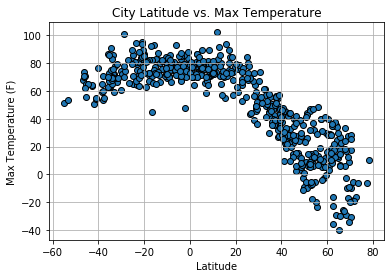

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

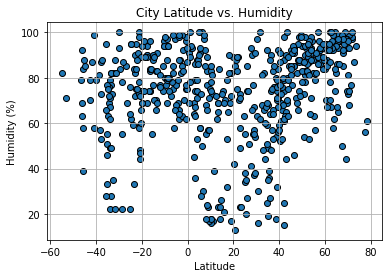

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

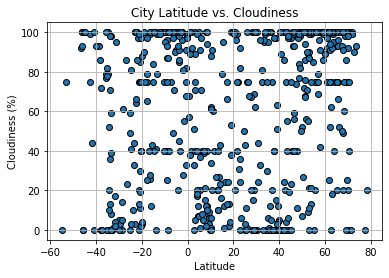

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

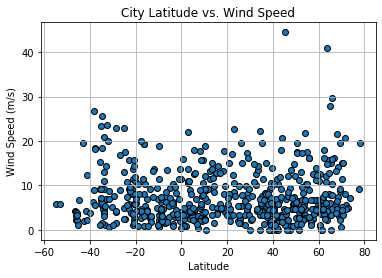

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
north_lat_data = city_data_df[city_data_df["Lat"] >=0]

south_lat_data = city_data_df[city_data_df["Lat"] < 0]


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(north_lat_data)

# Display sample data
northern_hemi_df.head() 
                             

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vadso,70.0744,29.7487,27.48,73,20,14.97,NO,1675317046
2,sedalia,38.7045,-93.2283,26.85,54,0,9.22,US,1675316635
3,khatanga,71.9667,102.5000,-18.40,97,100,5.66,RU,1675317047
4,lahij,13.1667,44.5833,70.65,69,10,5.08,YE,1675317048
5,wanning,18.8003,110.3967,73.54,82,100,8.03,CN,1675317049


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(south_lat_data)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,51.46,82,0,5.75,AR,1675317045
10,bluff,-46.6000,168.3333,68.04,79,92,4.23,NZ,1675317052
13,new norfolk,-42.7826,147.0587,63.90,70,99,1.99,AU,1675317054
15,ilo,-17.6394,-71.3375,71.55,90,79,4.09,PE,1675317055
17,busselton,-33.6500,115.3333,85.75,28,98,9.17,AU,1675317057


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.76


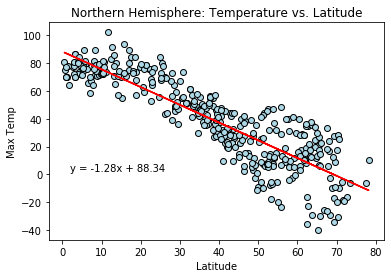

In [15]:
# Linear regression on Northern Hemisphere

# Set x and y values
x_values = north_lat_data["Lat"]
y_values = north_lat_data["Max Temp"]

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y = '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

# Generate scatter chart 
plt.scatter(x_values, y_values, marker = 'o', facecolors='lightblue', edgecolors="black")

# Plot line 
plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(2,2))

# Define Titles and X, Y values
plt.title("Northern Hemisphere: Temperature vs. Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")


# Print r-squared value
print(f"The r-value is: {round(rvalue**2,2)}")


The r-value is: 0.16


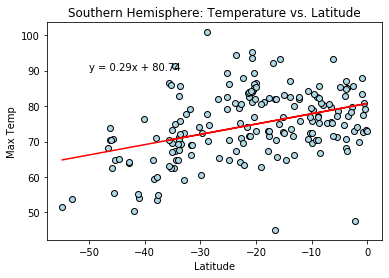

In [16]:
# Linear regression on Southern Hemisphere

# Set x and y values
x_values = south_lat_data["Lat"]
y_values = south_lat_data["Max Temp"]

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y = '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

# Generate scatter chart 
plt.scatter(x_values, y_values, marker = 'o', facecolors='lightblue', edgecolors="black")

# Plot line 
plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(-50,90))

# Define Titles and X, Y values
plt.title("Southern Hemisphere: Temperature vs. Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")


# Print r-squared value
print(f"The r-value is: {round(rvalue**2,2)}")

**Discussion about the linear relationship:** 

When looking at max temperature in relation to latitude in the Northern and Southern hemisphere we notice that  there is a strong linear relationship especially in the Northern hemisphere. As the latitude increase the temperature decreases. This data supports the hypothesis that cities near the equator tend to have higher temperatures. 



### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16


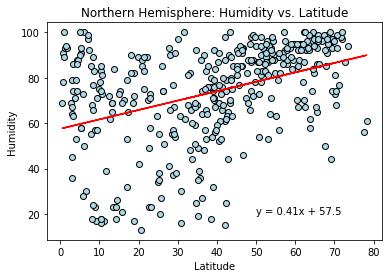

In [17]:
# Linear regression on Northern Hemisphere

# Set x and y values
x_values = north_lat_data["Lat"]
y_values = north_lat_data["Humidity"]

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y = '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

# Generate scatter chart 
plt.scatter(x_values, y_values, marker = 'o', facecolors='lightblue', edgecolors="black")

# Plot line 
plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(50,20))

# Define Titles and X, Y values
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")


# Print r-squared value
print(f"The r-value is: {round(rvalue**2,2)}")


The r-value is: 0.08


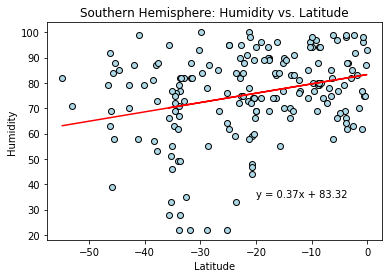

In [18]:
# Southern Hemisphere

# Set x and y values
x_values = south_lat_data["Lat"]
y_values = south_lat_data["Humidity"]

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y = '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

# Generate scatter chart 
plt.scatter(x_values, y_values, marker = 'o', facecolors='lightblue', edgecolors="black")

# Plot line 
plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(-20,35))

# Define Titles and X, Y values
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")


# Print r-squared value
print(f"The r-value is: {round(rvalue**2,2)}")

**Discussion about the linear relationship:** 

When looking at humidity in relation to latitude for the Northern and Southern hemisphere we notice that the r values are very close to 0. There isn't a much happening which suggests that there is no correlation between humidity and latitude. The humidity levels are scattered across the map. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1


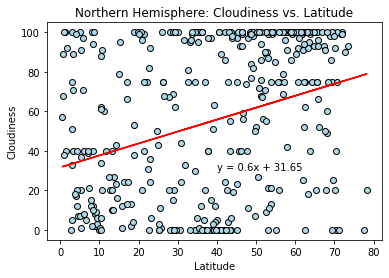

In [19]:
# Northern Hemisphere

# Set x and y values
x_values = north_lat_data["Lat"]
y_values = north_lat_data["Cloudiness"]

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y = '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

# Generate scatter chart 
plt.scatter(x_values, y_values, marker = 'o', facecolors='lightblue', edgecolors="black")

# Plot line 
plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(40,30))

# Define Titles and X, Y values
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")


# Print r-squared value
print(f'The r-value is: {round(rvalue**2,2)}')


The r-value is: 0.08


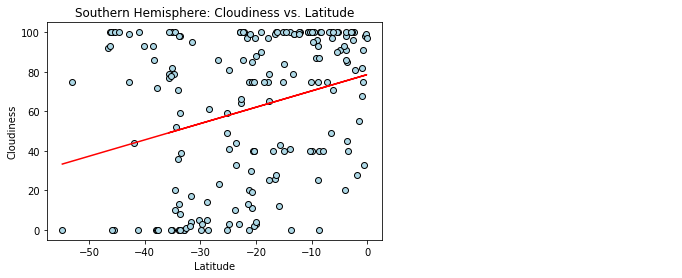

In [20]:
# Southern Hemisphere

# Set x and y values
x_values = south_lat_data["Lat"]
y_values = south_lat_data["Cloudiness"]

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y = '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

# Generate scatter chart 
plt.scatter(x_values, y_values, marker = 'o', facecolors='lightblue', edgecolors="black")

# Plot line 
plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(40,30))

# Define Titles and X, Y values
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")


# Print r-squared value
print(f'The r-value is: {round(rvalue**2,2)}')

**Discussion about the linear relationship:** 

When looking at cloudiness in relation to latitude in the Northern and Southern Hemisphere we notice that  the r values are very close to 0. There is no linear relationship between the two variables. The distance a city is from the equator does not indicate the cloudiness levels in that city. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01


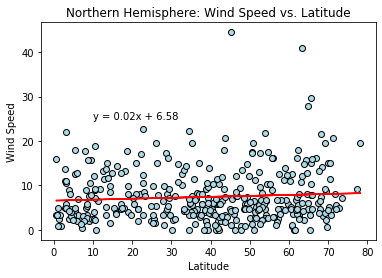

In [21]:
# Northern Hemisphere

# Set x and y values
x_values = north_lat_data["Lat"]
y_values = north_lat_data["Wind Speed"]

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y = '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

# Generate scatter chart 
plt.scatter(x_values, y_values, marker = 'o', facecolors='lightblue', edgecolors="black")

# Plot line 
plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(10,25))

# Define Titles and X, Y values
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")


# Print r-squared value
print(f'The r-value is: {round(rvalue**2,2)}')

The r-value is: 0.03


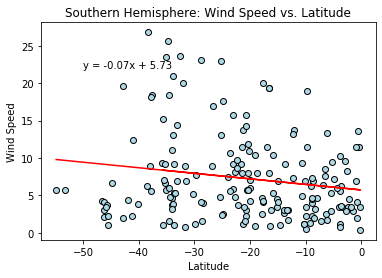

In [22]:
# Set x and y values
x_values = south_lat_data["Lat"]
y_values = south_lat_data["Wind Speed"]

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y = '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

# Generate scatter chart 
plt.scatter(x_values, y_values, marker = 'o', facecolors='lightblue', edgecolors="black")

# Plot line 
plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(-50,22))

# Define Titles and X, Y values
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")


# Print r-squared value
print(f'The r-value is: {round(rvalue**2,2)}')

**Discussion about the linear relationship:** When looking at wind in relation to latitude in the Northern and Southern Hemisphere we notice that the r values are very close to 0. There is no linear relationship between the two variables. The distance a city is from the equator does not indicate the wind speed in that city.